<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/CNN_Advancd_for_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Embedding, Flatten, Reshape
from keras import optimizers

from keras.models import Model
from keras.layers import concatenate, Input
from keras.layers import BatchNormalization


Using TensorFlow backend.


In [0]:
num_features = 3000
sequence_length = 300
embedding_dimension = 100

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_features)


17465344/17464789 [==============================] - 2s 0us/step


In [0]:
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

In [0]:
filter_sizes = [3, 4, 5]

In [0]:
def convolution():
  inn = Input(shape = (sequence_length, embedding_dimension, 1))
  convolutions = []
  for f_size in filter_sizes:
    conv = Conv2D(filters = 100, kernel_size = (f_size, embedding_dimension), strides = 1, padding = "valid")(inn)
    act = Activation('relu')(conv)
    maxpool = MaxPooling2D(pool_size = (sequence_length - f_size + 1, 1), padding = "valid")(act)
    convolutions.append(maxpool)
   
  outt = concatenate(convolutions)
  model = Model(inputs = inn, outputs = outt)
  
  return model

In [0]:
def cnn():
  model = Sequential()
  model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
  model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
  model.add(Dropout(0.5))
  model.add(convolution())
  model.add(Flatten())
  model.add(Dense(10))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  
  adam = optimizers.Adam()
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  
  return model

In [8]:
model = cnn()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
train_history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split = 0.2, verbose = 1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 19s 927us/step - loss: 0.3079 - acc: 0.8751 - val_loss: 0.2927 - val_acc: 0.8838
Epoch 2/100
20000/20000 [==============================] - 18s 920us/step - loss: 0.2771 - acc: 0.8913 - val_loss: 0.2836 - val_acc: 0.8916
Epoch 3/100
20000/20000 [==============================] - 18s 919us/step - loss: 0.2595 - acc: 0.9000 - val_loss: 0.2948 - val_acc: 0.8808
Epoch 4/100
20000/20000 [==============================] - 18s 920us/step - loss: 0.2312 - acc: 0.9122 - val_loss: 0.2689 - val_acc: 0.8912
Epoch 5/100
20000/20000 [==============================] - 18s 919us/step - loss: 0.2248 - acc: 0.9137 - val_loss: 0.2755 - val_acc: 0.8942
Epoch 6/100
20000/20000 [==============================] - 18s 918us/step - loss: 0.2179 - acc: 0.9155 - val_loss: 0.2685 - val_acc: 0.8910
Epoch 7/100
20000/20000 [==============================] - 18s 919us/step - loss: 0.2071 - acc: 0.9221 - val_lo

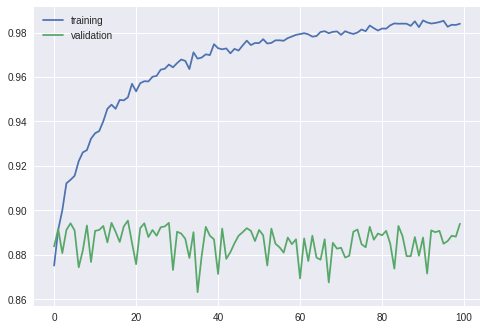

In [11]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.show()

In [12]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

25000/25000 [==============================] - 7s 276us/step
Test accuracy:  0.88856
